<h1>M. Nielsen, Chapter 6, 4th cnn model (relu, experiment with different h-params)</h1>

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
import os
import numpy as np
import time
import random
from winsound import Beep


In [5]:
import tensorflow as tf # changed to intel-optimized build
Beep(1000, 100)

In [8]:
from matplotlib import pyplot as plt

In [10]:
os.chdir(r"C:\Users\mchen\OneDrive\桌面\ml\code\tutorial\chapter3\20211119\multi_layer")

In [12]:
import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
Beep(1000, 100)

<h1>load data</h>

In [13]:
###############################################
#    load data from local directory
###############################################

train_x, train_y, val_x, val_y, test_x, test_y = [], [], [], [], [], []

training_data, validation_data, test_data = mnist_loader.load_data_wrapper()

for tra in training_data:
    img_tra_x = tra[0].reshape(28,28).tolist()
    img_tra_y = np.array(np.argmax(tra[1]), dtype=np.uint8)
    train_x.append(img_tra_x)
    train_y.append(img_tra_y)
print(np.shape(train_x))

for val in validation_data:
    img_val_x = val[0].reshape(28,28)
#     img_val_y = np.array(np.argmax(val[1]), dtype=np.uint8)
    img_val_y = np.array(val[1], dtype=np.uint8)
    val_x.append(img_val_x)
    val_y.append(img_val_y)
print(np.shape(val_x))

for tes in test_data:
    img_tes_x = tes[0].reshape(28,28)
    img_tes_y = np.array(tes[1], dtype=np.uint8)
    test_x.append(img_tes_x)
    test_y.append(img_tes_y)
print(np.shape(test_x))


train_x = np.array(train_x)
val_x = np.array(val_x)
test_x = np.array(test_x)

train_y = np.array(train_y)
val_y = np.array(val_y)
test_y = np.array(test_y)

Beep(1000, 100)

(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


In [16]:
# ###############################################
# #    checking data format:
# ###############################################
# plt.imshow(train_x[0], interpolation='none')
# plt.show()
# print('img label:', train_y[0])

# plt.imshow(val_x[0], interpolation='none')
# plt.show()
# print('img label:', val_y[0])

# plt.imshow(test_x[0], interpolation='none')
# plt.show()
# print('img label:', test_y[0])


<h1>Trying Implementing the relu CNN model as described in M. Nielsen, Chapter 6</h1>	

In [18]:
# >>> from network3 import ReLU
# >>> net = Network([
#         ConvPoolLayer(image_shape=(mini_batch_size, 1, 28, 28), 
#                       filter_shape=(20, 1, 5, 5), 
#                       poolsize=(2, 2), 
#                       activation_fn=ReLU),
#         ConvPoolLayer(image_shape=(mini_batch_size, 20, 12, 12), 
#                       filter_shape=(40, 20, 5, 5), 
#                       poolsize=(2, 2), 
#                       activation_fn=ReLU),
#         FullyConnectedLayer(n_in=40*4*4, n_out=100, activation_fn=ReLU),
#         SoftmaxLayer(n_in=100, n_out=10)], mini_batch_size)
# >>> net.SGD(training_data, 60, mini_batch_size, 0.03, 
#             validation_data, test_data, lmbda=0.1)

<h1>Reshape data</h1>

In [14]:
# reshape data
train_x = train_x.reshape(np.shape(train_x)[0], np.shape(train_x)[1], np.shape(train_x)[2], 1)
val_x = val_x.reshape(np.shape(val_x)[0], np.shape(val_x)[1], np.shape(val_x)[2], 1)
test_x = test_x.reshape(np.shape(test_x)[0], np.shape(test_x)[1], np.shape(test_x)[2], 1)

train_y = tf.one_hot(train_y.astype(np.int32), depth=10)
val_y = tf.one_hot(val_y.astype(np.int32), depth=10)
test_y = tf.one_hot(test_y.astype(np.int32), depth=10)
Beep(1000, 100)

<h1>Build Network model (relu, base-line)</h1>

lmbda= 0.1

eta= 0.03

n_eph= 23

batch_size= 10

n_eph= 23

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 20)        520       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 40)          20040     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 40)          0         
_________________________________________________________________
flatten (Flatten)            (None, 640)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               64100     
_____________________________________________________________

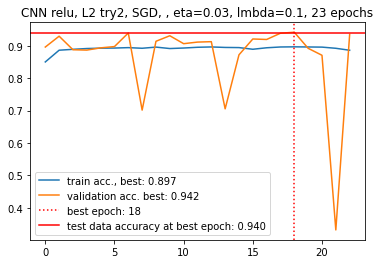

[0.8501399755477905, 0.8863599896430969, 0.8890799880027771, 0.8915200233459473, 0.8926600217819214, 0.89301997423172, 0.8942999839782715, 0.8923599720001221, 0.8959199786186218, 0.8914999961853027, 0.8930799961090088, 0.8953999876976013, 0.8964400291442871, 0.8949199914932251, 0.8944399952888489, 0.8892800211906433, 0.8938599824905396, 0.8963000178337097, 0.8967800140380859, 0.896340012550354, 0.8958799839019775, 0.8922799825668335, 0.8862199783325195]
[1.3645859956741333, 0.8606565594673157, 0.8236032724380493, 0.8092745542526245, 0.7963500022888184, 0.7879868745803833, 0.7757421135902405, 0.7758190631866455, 0.7680347561836243, 0.7770242094993591, 0.7720659971237183, 0.7584119439125061, 0.7553924918174744, 0.7582107782363892, 0.7601847052574158, 0.7828527092933655, 0.7545215487480164, 0.7547702193260193, 0.7506566643714905, 0.7506921887397766, 0.757823646068573, 0.7685464024543762, 0.7804003953933716]
[0.8960999846458435, 0.9296000003814697, 0.8877999782562256, 0.8866999745368958, 0

In [15]:
################################################################
#   relu CNN network as described in chapter 6
################################################################
tf.random.set_seed(42)
# tf.random.set_seed(24)
################################################################


#################################
#    h-param base line
#################################
lmbda = 0.1
eta = 0.03
n_eph = 20

batch_size = 10
n_eph = 23




################################################################
print('lmbda= {}\n'.format(lmbda))
print('eta= {}\n'.format(eta))
print('n_eph= {}\n'.format(n_eph))
print('batch_size= {}\n'.format(batch_size))
print('n_eph= {}\n'.format(n_eph))
################################################################


################################################################
# construct netwoek model
input_shape = (28, 28, 1)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D( # no padding
        20,
        (5,5),
        activation=tf.nn.relu,
        kernel_regularizer=tf.keras.regularizers.L2(l2=lmbda),
        input_shape=input_shape))

model.add(tf.keras.layers.MaxPool2D(strides=(2,2)))

model.add(tf.keras.layers.Conv2D( # no padding
        40,
        (5,5),
        activation=tf.nn.relu,
        kernel_regularizer=tf.keras.regularizers.L2(l2=lmbda)))

model.add(tf.keras.layers.MaxPool2D(strides=(2,2)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
        100,
        activation=tf.nn.relu,
        kernel_regularizer=tf.keras.regularizers.L2(l2=lmbda)))

model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))
################################################################

################################################################
# compile model
model.compile(
    optimizer=tf.keras.optimizers.SGD(
        learning_rate=eta,
        momentum=0.0,
        nesterov=False,
        name="SGD"),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

################################################################

model.summary()

################################################################
# save the model when val_acc is best
checkpoint_filepath = r'C:\Users\mchen\OneDrive\桌面\ml\code\tutorial\chapter6\save_model\cnn_relu_l2\cnn_relu_l2'

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
################################################################

################################################################
#    train model  (how do i randomize mini_batches?)


ts = time.time()
history = model.fit(
    train_x, train_y, 
    epochs=n_eph,
    batch_size=batch_size,
    validation_data=(val_x, val_y),
    callbacks=[model_checkpoint_callback],
    shuffle=True
)
te = time.time()

print('total time:', te - ts)


acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
################################################################


################################################################
#    load the weights for the best epoch (best val accuracy)
model.load_weights(checkpoint_filepath)

################################################################

################################################################
#    evaluate test data at the best epoch
[test_data_loss, test_data_accuracy] = model.evaluate(
    test_x, test_y,
    batch_size=len(test_x)
)
################################################################


plt.plot(acc, label='train acc., best: {:.3f}'.format(max(acc)))
plt.plot(val_acc, label='validation acc. best: {:.3f}'.format(max(val_acc)))
plt.title('CNN relu, L2 try2, SGD, , eta={}, lmbda={}, {} epochs'.format(eta, lmbda, n_eph))
plt.axvline(x=np.argmax(val_acc), c='r', ls=':', label='best epoch: {}'.format(np.argmax(val_acc)))
plt.axhline(y=test_data_accuracy, c='r', label='test data accuracy at best epoch: {:.3f}'.format(test_data_accuracy))
plt.legend()
plt.show()

Beep(1000, 100)


print(acc)
print(loss)
print(val_acc)
print(val_loss)

<h1>max accuracy= 94.0%<h1/>

<h1>Build Network model (relu, lmbda -> 1/10)</h1>

lmbda= 0.01

eta= 0.03

n_eph= 23

batch_size= 10

n_eph= 23

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 20)        520       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 20)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 40)          20040     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 40)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 640)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               64100     
__________________________________________________________

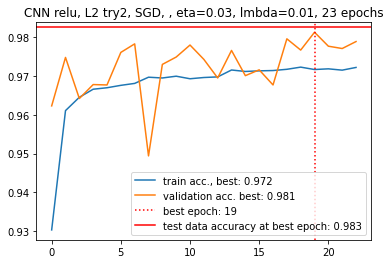

acc [0.9302999973297119, 0.961080014705658, 0.9645199775695801, 0.9666000008583069, 0.96697998046875, 0.9675999879837036, 0.9681000113487244, 0.9696999788284302, 0.9695000052452087, 0.9699599742889404, 0.9692999720573425, 0.9696199893951416, 0.9697800278663635, 0.971560001373291, 0.9711800217628479, 0.971340000629425, 0.9714199900627136, 0.9717400074005127, 0.9722999930381775, 0.9716799855232239, 0.9718599915504456, 0.9715200066566467, 0.9722200036048889]
loss [0.7159727215766907, 0.2839910686016083, 0.266290545463562, 0.25440412759780884, 0.24735642969608307, 0.24248521029949188, 0.237271249294281, 0.2332560420036316, 0.2314915657043457, 0.22973324358463287, 0.22702287137508392, 0.22524023056030273, 0.2241126149892807, 0.22184307873249054, 0.21944595873355865, 0.21961334347724915, 0.21819773316383362, 0.21772584319114685, 0.2159106433391571, 0.2161332666873932, 0.21475782990455627, 0.21425935626029968, 0.21265025436878204]
val_acc [0.9623000025749207, 0.9747999906539917, 0.96420001983

In [16]:
################################################################
#   relu CNN network as described in chapter 6
################################################################
tf.random.set_seed(42)
# tf.random.set_seed(24)
################################################################


#################################
#    h-param base line
#################################
lmbda = 0.1 / 10
eta = 0.03
n_eph = 20

batch_size = 10
n_eph = 23




################################################################
print('lmbda= {}\n'.format(lmbda))
print('eta= {}\n'.format(eta))
print('n_eph= {}\n'.format(n_eph))
print('batch_size= {}\n'.format(batch_size))
print('n_eph= {}\n'.format(n_eph))
################################################################


################################################################
# construct netwoek model
input_shape = (28, 28, 1)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D( # no padding
        20,
        (5,5),
        activation=tf.nn.relu,
        kernel_regularizer=tf.keras.regularizers.L2(l2=lmbda),
        input_shape=input_shape))

model.add(tf.keras.layers.MaxPool2D(strides=(2,2)))

model.add(tf.keras.layers.Conv2D( # no padding
        40,
        (5,5),
        activation=tf.nn.relu,
        kernel_regularizer=tf.keras.regularizers.L2(l2=lmbda)))

model.add(tf.keras.layers.MaxPool2D(strides=(2,2)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
        100,
        activation=tf.nn.relu,
        kernel_regularizer=tf.keras.regularizers.L2(l2=lmbda)))

model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))
################################################################

################################################################
# compile model
model.compile(
    optimizer=tf.keras.optimizers.SGD(
        learning_rate=eta,
        momentum=0.0,
        nesterov=False,
        name="SGD"),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

################################################################

model.summary()

################################################################
# save the model when val_acc is best
checkpoint_filepath = r'C:\Users\mchen\OneDrive\桌面\ml\code\tutorial\chapter6\save_model\cnn_relu_l2\cnn_relu_l2'

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
################################################################

################################################################
#    train model  (how do i randomize mini_batches?)


ts = time.time()
history = model.fit(
    train_x, train_y, 
    epochs=n_eph,
    batch_size=batch_size,
    validation_data=(val_x, val_y),
    callbacks=[model_checkpoint_callback],
    shuffle=True
)
te = time.time()

print('total time:', te - ts)


acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
################################################################


################################################################
#    load the weights for the best epoch (best val accuracy)
model.load_weights(checkpoint_filepath)

################################################################

################################################################
#    evaluate test data at the best epoch
[test_data_loss, test_data_accuracy] = model.evaluate(
    test_x, test_y,
    batch_size=len(test_x)
)
################################################################


plt.plot(acc, label='train acc., best: {:.3f}'.format(max(acc)))
plt.plot(val_acc, label='validation acc. best: {:.3f}'.format(max(val_acc)))
plt.title('CNN relu, L2 try2, SGD, , eta={}, lmbda={}, {} epochs'.format(eta, lmbda, n_eph))
plt.axvline(x=np.argmax(val_acc), c='r', ls=':', label='best epoch: {}'.format(np.argmax(val_acc)))
plt.axhline(y=test_data_accuracy, c='r', label='test data accuracy at best epoch: {:.3f}'.format(test_data_accuracy))
plt.legend()
plt.show()

Beep(1000, 100)


print('acc', acc)
print('loss', loss)
print('val_acc', val_acc)
print('val_loss', val_loss)

<h1>max accuracy= 98.3%<h1/>

<h1>Build Network model (relu, lmbda -> 1/100)</h1>

lmbda= 0.001

eta= 0.03

n_eph= 23

batch_size= 10

n_eph= 23

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 24, 24, 20)        520       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 20)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 40)          20040     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 40)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 640)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               64100     
_________________________________________________________

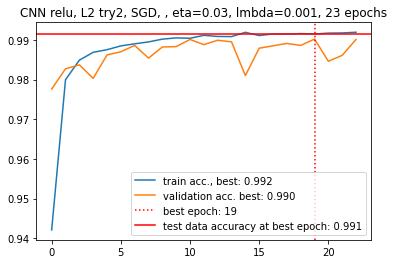

acc [0.942080020904541, 0.9799399971961975, 0.9848799705505371, 0.9868599772453308, 0.9875199794769287, 0.9884799718856812, 0.9890000224113464, 0.9894800186157227, 0.9901800155639648, 0.9904999732971191, 0.9904000163078308, 0.9911400079727173, 0.9908599853515625, 0.9908199906349182, 0.9919000267982483, 0.9910799860954285, 0.9915000200271606, 0.9914600253105164, 0.9915800094604492, 0.9914799928665161, 0.9916999936103821, 0.9917399883270264, 0.991919994354248]
loss [0.3629576861858368, 0.18760822713375092, 0.1394575834274292, 0.11339325457811356, 0.09865280985832214, 0.08978799730539322, 0.08371267467737198, 0.07991821318864822, 0.07655040174722672, 0.07549016922712326, 0.07444541156291962, 0.07239197939634323, 0.07266125082969666, 0.07203713059425354, 0.06892720609903336, 0.07024256139993668, 0.06894559413194656, 0.06902854144573212, 0.06811600178480148, 0.0683053657412529, 0.06658904254436493, 0.06699380278587341, 0.06662127375602722]
val_acc [0.9775999784469604, 0.982699990272522, 0.9

In [17]:
################################################################
#   relu CNN network as described in chapter 6
################################################################
tf.random.set_seed(42)
# tf.random.set_seed(24)
################################################################


#################################
#    h-param base line
#################################
lmbda = 0.1 / 10 / 10
eta = 0.03
n_eph = 20

batch_size = 10
n_eph = 23




################################################################
print('lmbda= {}\n'.format(lmbda))
print('eta= {}\n'.format(eta))
print('n_eph= {}\n'.format(n_eph))
print('batch_size= {}\n'.format(batch_size))
print('n_eph= {}\n'.format(n_eph))
################################################################


################################################################
# construct netwoek model
input_shape = (28, 28, 1)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D( # no padding
        20,
        (5,5),
        activation=tf.nn.relu,
        kernel_regularizer=tf.keras.regularizers.L2(l2=lmbda),
        input_shape=input_shape))

model.add(tf.keras.layers.MaxPool2D(strides=(2,2)))

model.add(tf.keras.layers.Conv2D( # no padding
        40,
        (5,5),
        activation=tf.nn.relu,
        kernel_regularizer=tf.keras.regularizers.L2(l2=lmbda)))

model.add(tf.keras.layers.MaxPool2D(strides=(2,2)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
        100,
        activation=tf.nn.relu,
        kernel_regularizer=tf.keras.regularizers.L2(l2=lmbda)))

model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))
################################################################

################################################################
# compile model
model.compile(
    optimizer=tf.keras.optimizers.SGD(
        learning_rate=eta,
        momentum=0.0,
        nesterov=False,
        name="SGD"),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

################################################################

model.summary()

################################################################
# save the model when val_acc is best
checkpoint_filepath = r'C:\Users\mchen\OneDrive\桌面\ml\code\tutorial\chapter6\save_model\cnn_relu_l2\cnn_relu_l2'

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
################################################################

################################################################
#    train model  (how do i randomize mini_batches?)


ts = time.time()
history = model.fit(
    train_x, train_y, 
    epochs=n_eph,
    batch_size=batch_size,
    validation_data=(val_x, val_y),
    callbacks=[model_checkpoint_callback],
    shuffle=True
)
te = time.time()

print('total time:', te - ts)


acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
################################################################


################################################################
#    load the weights for the best epoch (best val accuracy)
model.load_weights(checkpoint_filepath)

################################################################

################################################################
#    evaluate test data at the best epoch
[test_data_loss, test_data_accuracy] = model.evaluate(
    test_x, test_y,
    batch_size=len(test_x)
)
################################################################


plt.plot(acc, label='train acc., best: {:.3f}'.format(max(acc)))
plt.plot(val_acc, label='validation acc. best: {:.3f}'.format(max(val_acc)))
plt.title('CNN relu, L2 try2, SGD, , eta={}, lmbda={}, {} epochs'.format(eta, lmbda, n_eph))
plt.axvline(x=np.argmax(val_acc), c='r', ls=':', label='best epoch: {}'.format(np.argmax(val_acc)))
plt.axhline(y=test_data_accuracy, c='r', label='test data accuracy at best epoch: {:.3f}'.format(test_data_accuracy))
plt.legend()
plt.show()

Beep(1000, 100)


print('acc', acc)
print('loss', loss)
print('val_acc', val_acc)
print('val_loss', val_loss)

<h1>max accuracy= 99.1%<h1/>

<h1>Build Network model (relu, lmbda -> 1/1000)</h1>

lmbda= 0.0001

eta= 0.03

n_eph= 23

batch_size= 10

n_eph= 23

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 24, 24, 20)        520       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 12, 20)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 8, 8, 40)          20040     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 4, 40)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 640)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               64100     
________________________________________________________

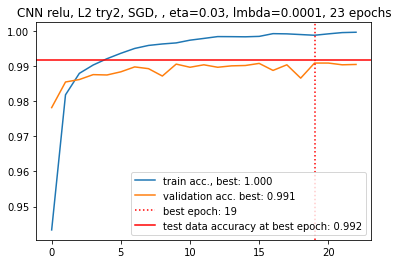

acc [0.943340003490448, 0.9818400144577026, 0.9879599809646606, 0.990339994430542, 0.992139995098114, 0.9936800003051758, 0.9950600266456604, 0.9959200024604797, 0.9963399767875671, 0.9966400265693665, 0.9974200129508972, 0.9979199767112732, 0.9984400272369385, 0.998420000076294, 0.9983800053596497, 0.9984999895095825, 0.9992799758911133, 0.9992200136184692, 0.999019980430603, 0.9988200068473816, 0.9992200136184692, 0.9995800256729126, 0.9996799826622009]
loss [0.2015954703092575, 0.07964184135198593, 0.063738152384758, 0.05406472831964493, 0.04783456400036812, 0.043261077255010605, 0.039599526673555374, 0.03662694990634918, 0.03424292802810669, 0.03272314742207527, 0.03050827793776989, 0.028300942853093147, 0.026044480502605438, 0.02606959640979767, 0.024795042350888252, 0.024475134909152985, 0.02180299535393715, 0.02153930440545082, 0.021361466497182846, 0.02139861322939396, 0.020120922476053238, 0.018344789743423462, 0.017373206093907356]
val_acc [0.9782000184059143, 0.9854999780654

In [19]:
################################################################
#   relu CNN network as described in chapter 6
################################################################
tf.random.set_seed(42)
# tf.random.set_seed(24)
################################################################


#################################
#    h-param base line
#################################
lmbda = 0.1 / 10 / 10 / 10
eta = 0.03
n_eph = 20

batch_size = 10
n_eph = 23




################################################################
print('lmbda= {}\n'.format(lmbda))
print('eta= {}\n'.format(eta))
print('n_eph= {}\n'.format(n_eph))
print('batch_size= {}\n'.format(batch_size))
print('n_eph= {}\n'.format(n_eph))
################################################################


################################################################
# construct netwoek model
input_shape = (28, 28, 1)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D( # no padding
        20,
        (5,5),
        activation=tf.nn.relu,
        kernel_regularizer=tf.keras.regularizers.L2(l2=lmbda),
        input_shape=input_shape))

model.add(tf.keras.layers.MaxPool2D(strides=(2,2)))

model.add(tf.keras.layers.Conv2D( # no padding
        40,
        (5,5),
        activation=tf.nn.relu,
        kernel_regularizer=tf.keras.regularizers.L2(l2=lmbda)))

model.add(tf.keras.layers.MaxPool2D(strides=(2,2)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
        100,
        activation=tf.nn.relu,
        kernel_regularizer=tf.keras.regularizers.L2(l2=lmbda)))

model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))
################################################################

################################################################
# compile model
model.compile(
    optimizer=tf.keras.optimizers.SGD(
        learning_rate=eta,
        momentum=0.0,
        nesterov=False,
        name="SGD"),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

################################################################

model.summary()

################################################################
# save the model when val_acc is best
checkpoint_filepath = r'C:\Users\mchen\OneDrive\桌面\ml\code\tutorial\chapter6\save_model\cnn_relu_l2\cnn_relu_l2'

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
################################################################

################################################################
#    train model  (how do i randomize mini_batches?)


ts = time.time()
history = model.fit(
    train_x, train_y, 
    epochs=n_eph,
    batch_size=batch_size,
    validation_data=(val_x, val_y),
    callbacks=[model_checkpoint_callback],
    shuffle=True
)
te = time.time()

print('total time:', te - ts)


acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
################################################################


################################################################
#    load the weights for the best epoch (best val accuracy)
model.load_weights(checkpoint_filepath)

################################################################

################################################################
#    evaluate test data at the best epoch
[test_data_loss, test_data_accuracy] = model.evaluate(
    test_x, test_y,
    batch_size=len(test_x)
)
################################################################


plt.plot(acc, label='train acc., best: {:.3f}'.format(max(acc)))
plt.plot(val_acc, label='validation acc. best: {:.3f}'.format(max(val_acc)))
plt.title('CNN relu, L2 try2, SGD, , eta={}, lmbda={}, {} epochs'.format(eta, lmbda, n_eph))
plt.axvline(x=np.argmax(val_acc), c='r', ls=':', label='best epoch: {}'.format(np.argmax(val_acc)))
plt.axhline(y=test_data_accuracy, c='r', label='test data accuracy at best epoch: {:.3f}'.format(test_data_accuracy))
plt.legend()
plt.show()

Beep(1000, 100)


print('acc', acc)
print('loss', loss)
print('val_acc', val_acc)
print('val_loss', val_loss)

<h1>max accuracy= 99.1%<h1/>